<a href="https://colab.research.google.com/github/Ppcat99/Data-Science_project_Parth-Patel/blob/main/Linear_vs_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Objective of this Linear vs SVR was to compare how the two model one fully
# linear (linear Regression) vs SVR(non-linear Regression). how they compare
# with each other.

# SVR stand for Support Vector Regression, it's an adaption of Support Vector
# Machines (SVM) which is primarly used for classification problems. While SVM
# find a hyperplane that seperates different classes of data. SVR finds a
# hyperplane that best fits the data points within a certain margin of error.

# This model is used for Handing non-linear Data, and It is Robustness to
# Outliers.

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [ ]:
# Loading the dataset
housing = fetch_california_housing()

# Converting to a dataframe for easier maniputation
# The 'data' attribute contains the features and 'target' contains the house Prices.
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

In [ ]:
# Display first 5 values
print(df.head())
# Get a summary of the Dataframe's structure
print(df.info())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

In [ ]:
# This describe the mean, standard deviation, and the ranges for each of the columns
print(df.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [ ]:
# Data Cleaning #
# --------------------------------------#
# Check for missing values in each column
print("Missing Values per column:", df.isnull().sum())
# We notice that there are no missinf values

# Get a concise summary of the dataFrame, including data types
print("/nDataFrame Summary:", df.info())
# According to summary we got float values and no non-null

Missing Values per column: MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
/nDataFrame Summary: None


In [ ]:
# Checking for duplicates
# Counting number of duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")
# Accoring to checking the duplicates we got no duplicates in this dataset

Number of duplicates: 0


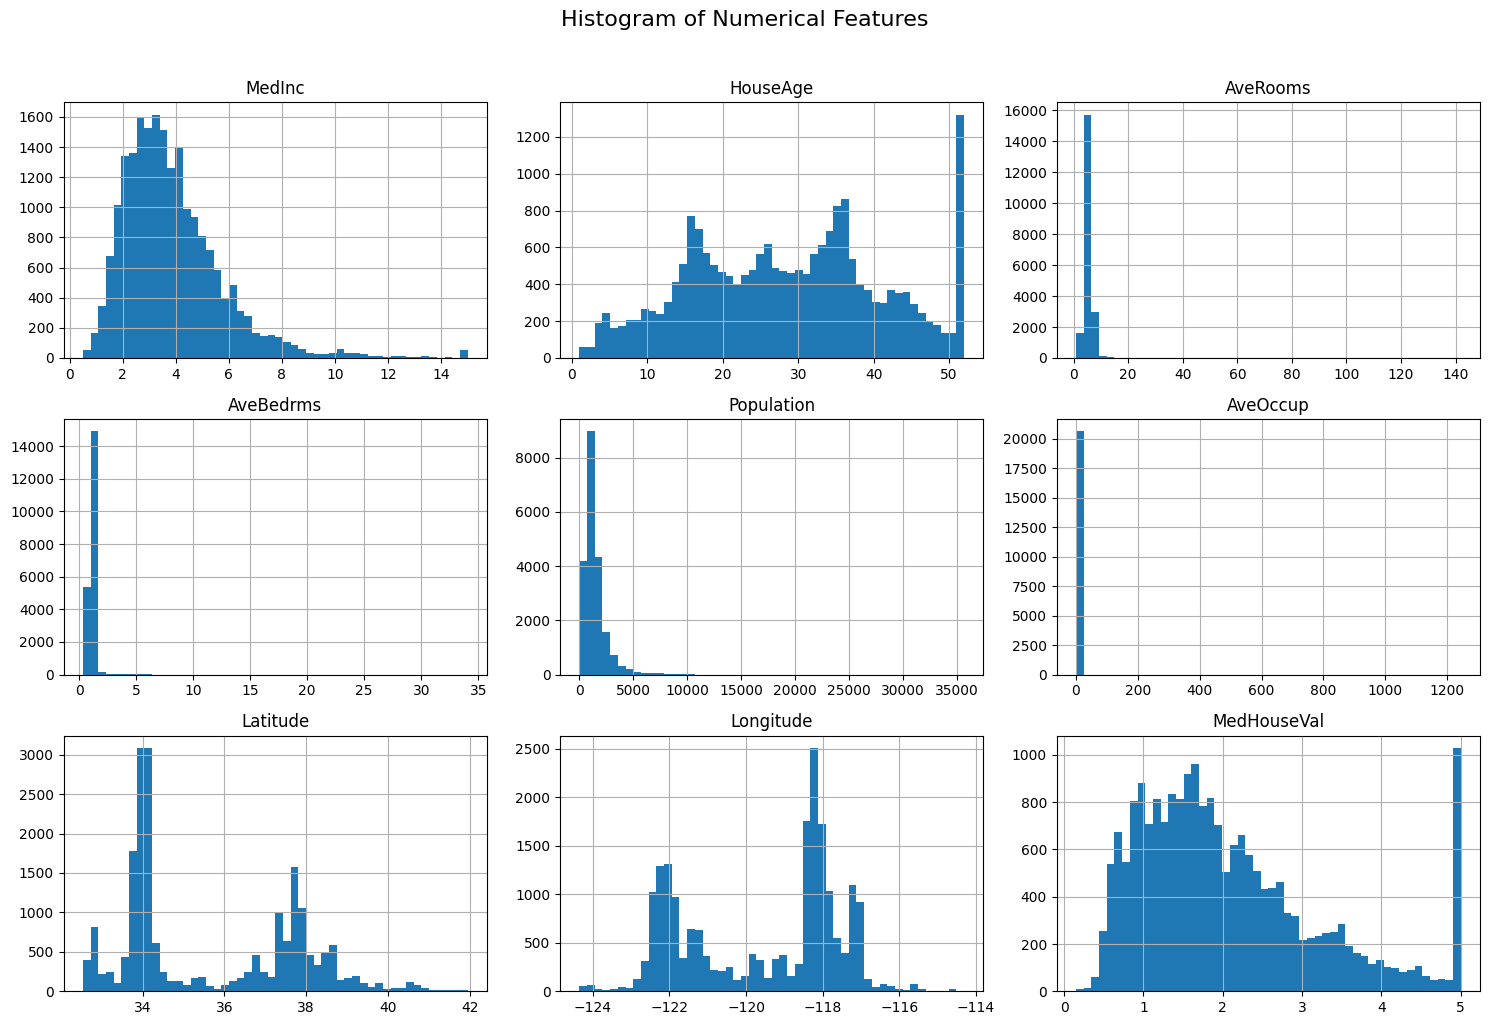

In [ ]:
import matplotlib.pyplot as plt

# Ploting histogram for all numerical features to see their distributions
df.hist(figsize=(15,10), bins=50)
plt.suptitle('Histogram of Numerical Features', y=1.02, size=16)
plt.tight_layout()
plt.show()
# This are all the histogram of each of the variables on the dataset

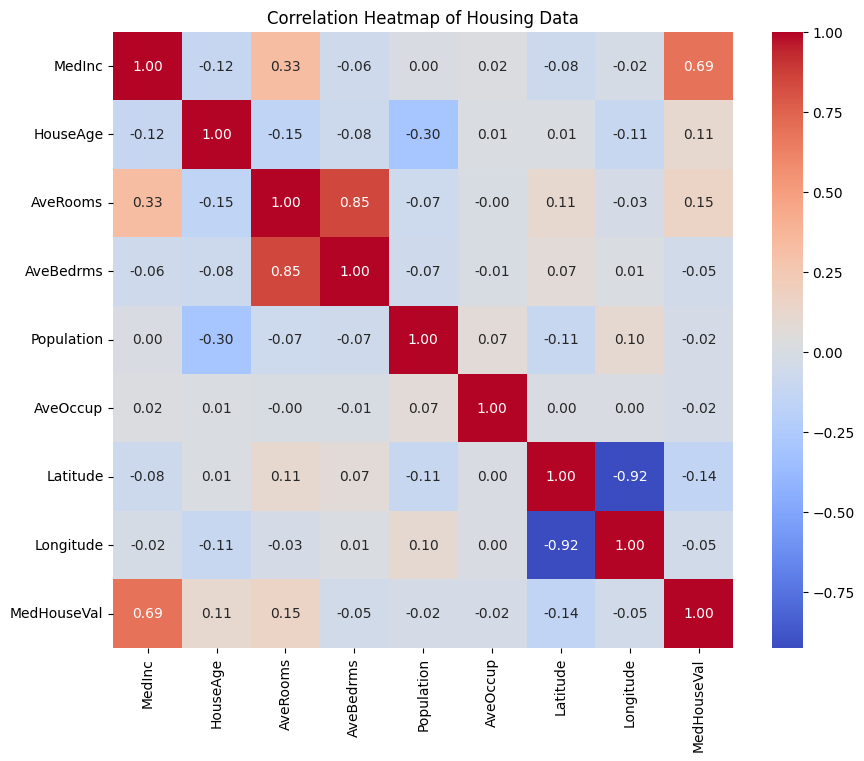

In [ ]:
# Your Target Value is MedHouseVal
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Housing Data')
plt.show()
# Heatmap shows value closer to 1 or -1 considers strong linear relationship
# value closer to 0 considers a week relationship
# Color closer to red is values near 1, white is 0, and value closer to blue is
# negative numbers

In [ ]:
# We can a split the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seperating features (X) from the target (y)
# we can be using 'MedHouseVal' is the column we will predict
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Spliting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Intialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training features and transform them
X_train_scaled = scaler.fit_transform(X_train)

# we can he using the Same scaler to tranform the test features
X_test_scaled = scaler.transform(X_test)

print("Data preparation complete. Your data is now ready for modeling.")

Data preparation complete. Your data is now ready for modeling.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Training the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("Linear Regression model training complete.")

# Step 2: Make Predictions on the test data
y_pred = model.predict(X_test_scaled)

# Step 3: Evaluate the Model's Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Performance ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# MSE: 0.56, that means average squared difference between your model's prediction
# and the actual house price is 0.56.
# R2 Score: 0.58, which means 58% of the variance in the median house value in
# your dataset so 42% are unexplained which is more complex model.

Linear Regression model training complete.

--- Model Performance ---
Mean Squared Error (MSE): 0.56
R-squared (R2) Score: 0.58


In [ ]:
# Training and evaluating the SVR Model
from sklearn.svm import SVR

# Create and train the SVR model
model_svr = SVR(kernel='linear')
model_svr.fit(X_train_scaled, y_train)
print("SVR model training complete.")

# Make predictions using the SVR model
y_pred_svr = model_svr.predict(X_test_scaled)

# Calculate metrics for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\n--- SVR Results ---")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"R-squared (R2) Score: {r2_svr:.2f}")

# Why this result because SVR has a hyperparameter that needed to be tuned to
# your specific dataset


SVR model training complete.

--- SVR Results ---
Mean Squared Error (MSE): 0.58
R-squared (R2) Score: 0.56


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create a single SVR model with a reasonable set of parameters
# This bypasses the time-consuming search process
quick_svr_model = SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.2)

# Train the model on the scaled training data
quick_svr_model.fit(X_train_scaled, y_train)

# Make predictions with this model
y_pred_quick = quick_svr_model.predict(X_test_scaled)

# Evaluate the performance
mse_quick = mean_squared_error(y_test, y_pred_quick)
r2_quick = r2_score(y_test, y_pred_quick)

print("--- Quick SVR Results ---")
print(f"Mean Squared Error (MSE): {mse_quick:.2f}")
print(f"R-squared (R2) Score: {r2_quick:.2f}")

# R2 = 0.75 which means that your SVR model even without the full hyperparameter
# search can explain 75% of the variance in the median house prices. Very Strong
# improvement from the 58% if we go with linear regression.

# MSE = 0.32 which means that your average error on your model's predictions
# is now about $56,500 which is .32 times $100,000. This is better performance
# than the $75,000 average error in the linear regression.

--- Quick SVR Results ---
Mean Squared Error (MSE): 0.32
R-squared (R2) Score: 0.75


In [ ]:
# Three take ways between Two different models
# 1. Start with the baseline: Always begin with linear Regression model it gives
# us the baseline of what to do next.

# 2. Complex model are not always better than by default: An SVR model with its
# default setting performed worsed than the simple linear model. The highlight
# we got from this comparison was model's complexibility is always not guarantee
# better performance

# 3.Hyperparameter Tuning is Crucial for SVR model to perform better results.

In [ ]:
from sklearn.svm import SVR

# Create a single SVR model with a reasonable set of parameters
quick_svr_model = SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.2)

# Train the model on the scaled training data
quick_svr_model.fit(X_train_scaled, y_train)

# Make predictions with this model
y_pred_tuned = quick_svr_model.predict(X_test_scaled)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test_scaled)

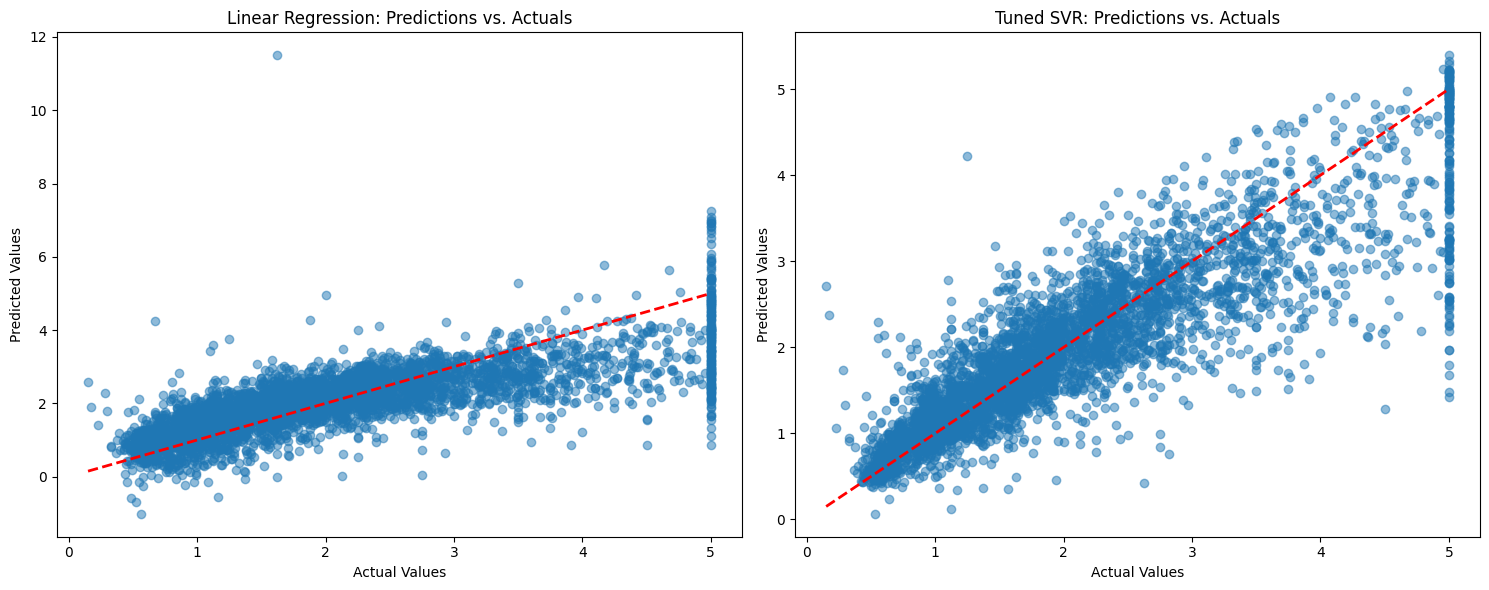

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Linear Regression Predictions
axes[0].scatter(y_test, y_pred_lr, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # 45-degree line
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].set_title("Linear Regression: Predictions vs. Actuals")

# Subplot 2: SVR Predictions
axes[1].scatter(y_test, y_pred_tuned, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # 45-degree line
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")
axes[1].set_title("Tuned SVR: Predictions vs. Actuals")

plt.tight_layout()
plt.show()

# According to the linear vs SVR models: Linear Regression model on the left
# start from 0 to 5 it is more like a slater positive slope and has wider spread
# that result to larger the error and bigger outlier.

# Where the Tuned SVR model on the right is pretty spread apart has a more of
# a normal positive curve also has higher R-squared which results to more
# accurate and consistant resulton the entire range of house values.

# Overall, SVR is more closer to the real dataset

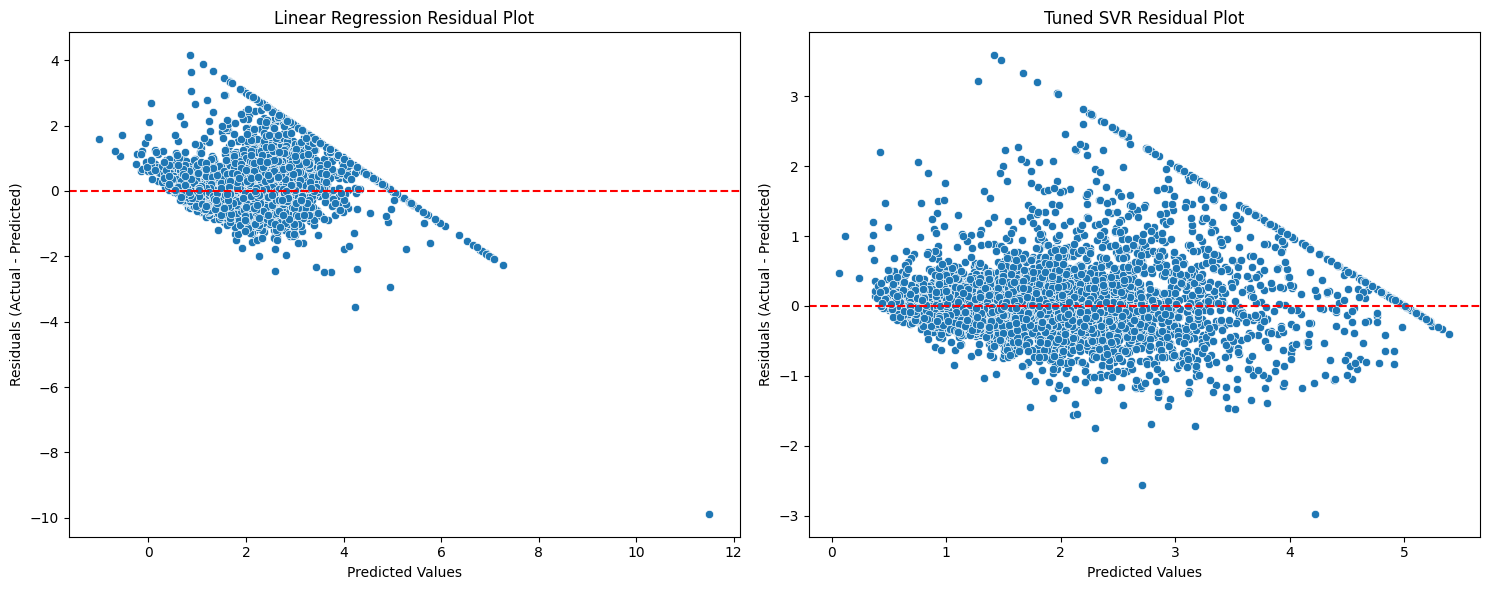

In [ ]:
import seaborn as sns

# Calculate residuals for each model
residuals_lr = y_test - y_pred_lr
residuals_svr = y_test - y_pred_tuned

# Create a figure with two subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Linear Regression Residuals
sns.scatterplot(x=y_pred_lr, y=residuals_lr, ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals (Actual - Predicted)")
axes[0].set_title("Linear Regression Residual Plot")

# Subplot 2: SVR Residuals
sns.scatterplot(x=y_pred_tuned, y=residuals_svr, ax=axes[1])
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel("Predicted Values")
axes[1].set_ylabel("Residuals (Actual - Predicted)")
axes[1].set_title("Tuned SVR Residual Plot")

plt.tight_layout()
plt.show()

# On the Residual Plot on the linear Regression on the left, It also show the
# same story on the Residual Plot they are more close together

# Tuned SVR is more randomly scattered around the horzontal zero line. The model
# error are more unifrom and constant which is better fitting model.

# Same thing with Residual Plot, Tuned SVR is a great choice, because it is non
# linear relationship that leads to more accurate and reliable predictions.